In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# importing the dataset
df = pd.read_csv('internet_service_churn.csv')
df.head() # see the top 5 rows of the dataset

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
# Checking the shape of the dataset
df.shape

(72274, 11)

The dataset has 72274 rows and 11 columns at all.

In [4]:
# checking basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


Here most of the features has integer and float datatype but some may shoule as category which will checked later. For now let's check the null values.

In [5]:
df.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

Some variable like "reamining_contract" has 29% missing values. Other two variables "download_avg" & "upload_av" has also a little missing value and their percetage is same 0.52%

## Exploratory Data Analysis (EDA)

1    40050
0    32224
Name: churn, dtype: int64


[]

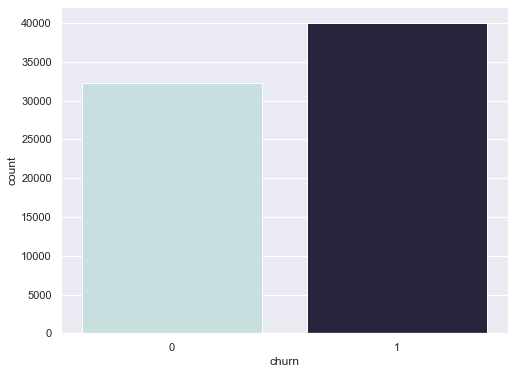

In [7]:
# First let's see how much customer are already churned

print(df['churn'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')
plt.plot()

From the above visualization and "counted number" it can be interpreted that most of customer has already cancelled the service.

In [8]:
# Now let's check if the customer has "tv_subscription" who has cancelled the service

# First check the number of TV subscriber and not subscriberr
df['is_tv_subscriber'].value_counts()

1    58922
0    13352
Name: is_tv_subscriber, dtype: int64

Here we can see that most of the customer has "TV Subscription" Let's see this with a plot

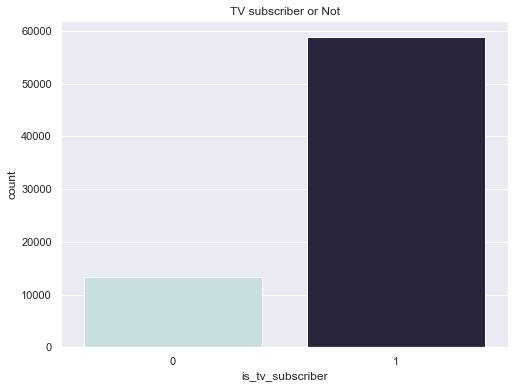

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'is_tv_subscriber', palette= 'ch:start=.2,rot=-.3')
plt.title('TV subscriber or Not')
plt.show()

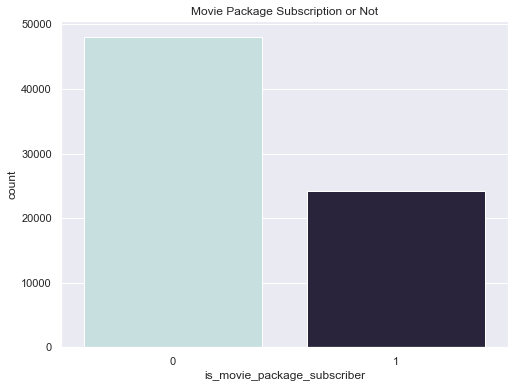

In [14]:
# Now let's check if the customers has a "Movie Package subscription" or not
# First we'll see the number of counts and then will see a visual graph for this
df['is_movie_package_subscriber'].value_counts()

plt.figure(figsize = (8,6))
sns.countplot(data =df, x = 'is_movie_package_subscriber', palette= 'ch:start=.2,rot=-.3')
plt.title('Movie Package Subscription or Not')
plt.show()

Here only one third of the customer has "Movie Package Subscription" and rest don't have any. Let's see with a countplot

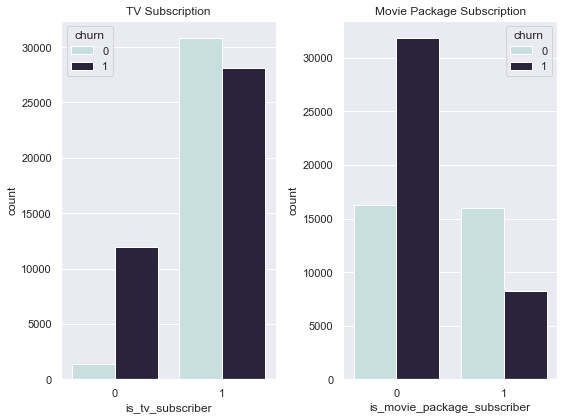

In [15]:
# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Tv subscription or not
sns.countplot(data = df, x = 'is_tv_subscriber', hue = 'churn', palette= 'ch:start=.2,rot=-.3', ax=axes[0])
axes[0].set_title("TV Subscription")

# Movie package subscription or not
sns.countplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn', palette= 'ch:start=.2,rot=-.3', ax=axes[1])
axes[1].set_title('Movie Package Subscription')
fig.tight_layout()

Here we can see the customers who has 'tv subscription' cancelled the service. But the customer who cancelled the service doesn't have movie pack subscription so much

In [16]:
# Now, let's check for  service_failure_count features
# first check the unique category
print(df['service_failure_count'].unique())
print(df['service_failure_count'].value_counts())

[ 0  1  2  6  4 10  5  3  8  7 11  9 13 14 15 19 18 12 16]
0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
18        1
19        1
Name: service_failure_count, dtype: int64


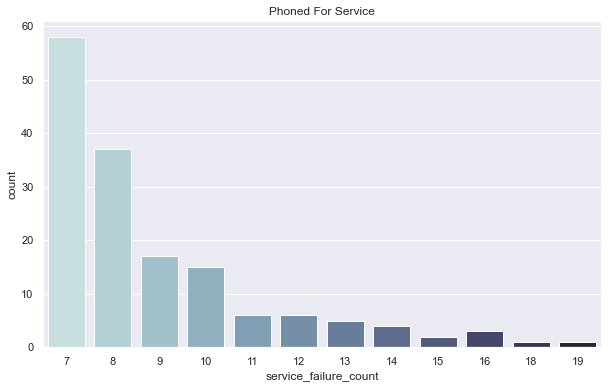

In [17]:
# Let's see how much customer phoned for service more than 6 times in last 3 months

data = df[df['service_failure_count'] > 6]
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=.2,rot=-.3')
plt.title('Phoned For Service')
plt.show()

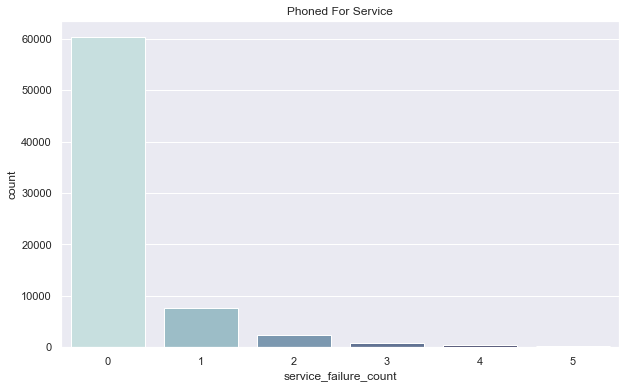

In [18]:
# Here we can see only a few customer phoned more than 6 times within last 3 months.
# which means most of the customer didn't phone much.

# Let's see how much customer phoned for service less than 6 times in last 3 months
data = df[df['service_failure_count'] < 6]
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=.2,rot=-.3')
plt.title('Phoned For Service')
plt.show()

Impressive. Most of the customer didn't phone at least once within last three months

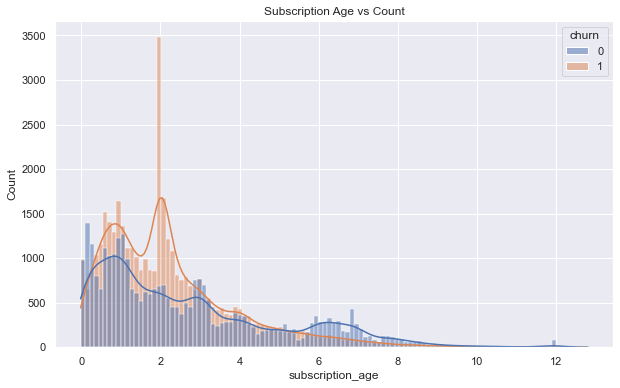

In [19]:
# Now let's check the 'subscription age' and how it is distributed
# I'll use hisagram for that

plt.figure(figsize = (10,6))
sns.histplot(data = df, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

We can see that subscription age is skewedly distributed

<Figure size 720x432 with 0 Axes>

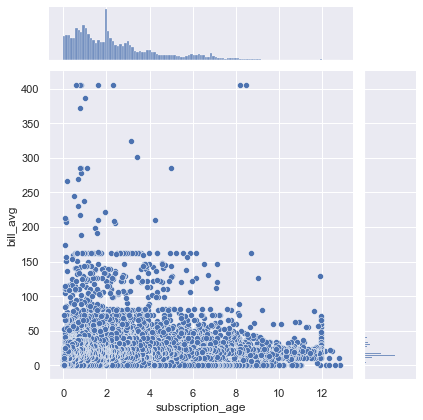

In [20]:
# Now let's use a jointplot to see the age and avg bill at time

plt.figure(figsize = (10,6))
sns.jointplot(data = df, x = 'subscription_age', y = 'bill_avg', kind =  'scatter', palette= 'ch:start=.2,rot=-.3')
plt.show()

Here we can see that most of the customer who has just started the service has higher average bill and most older customer has lower average bill. This is not a very important interpretation because it can be depend on the speed and package the customer has.

Now let's check the average download and upload limit

<Figure size 720x432 with 0 Axes>

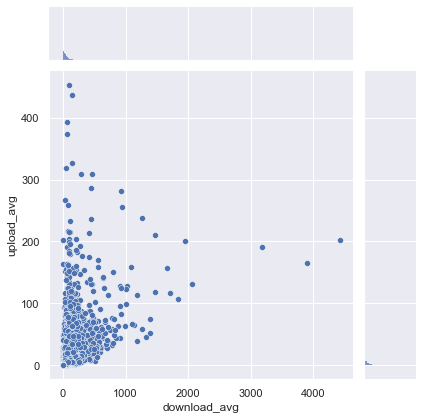

In [21]:
plt.figure(figsize = (10,6))
sns.jointplot(data = df, x = 'download_avg', y = 'upload_avg', kind =  'scatter', palette= 'ch:start=.2,rot=-.3')
plt.show()

Here most of the download and upload speed relay within 1000 and 100 and we there are some exceptional data point which may be outliers in the dataset.

In [22]:
# Let's use boxplot to see if there is outliers in the dataset.
# for this I'll use a function to make it easy
def boxplot_(var):
    plt.figure(figsize = (10,7))
    sns.boxplot(y = var, data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')
    plt.show()

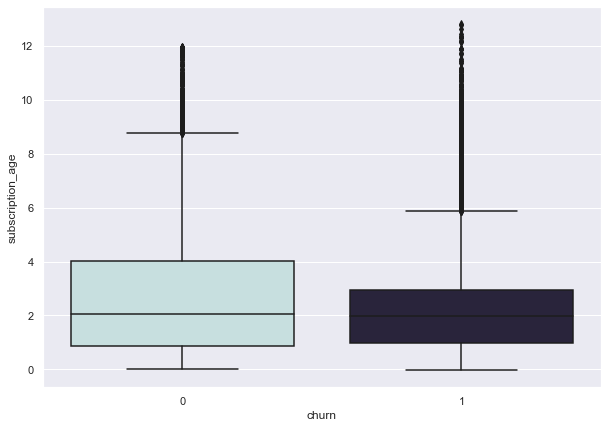

In [23]:
# Finding outliers for "subscription age"

boxplot_('subscription_age')

For the 'subscription_age' there are so many outlier. Let's check for other variables

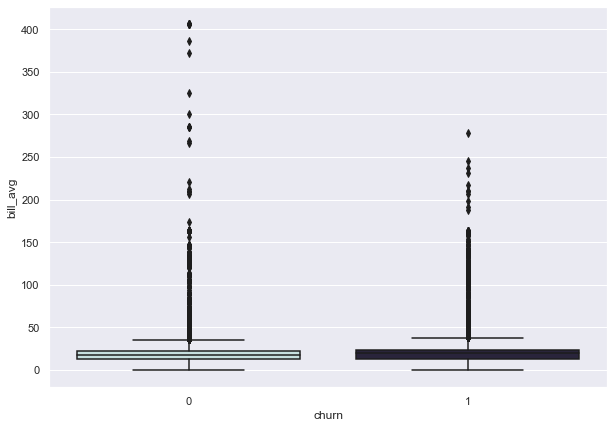

In [24]:
# for average bill
boxplot_('bill_avg')

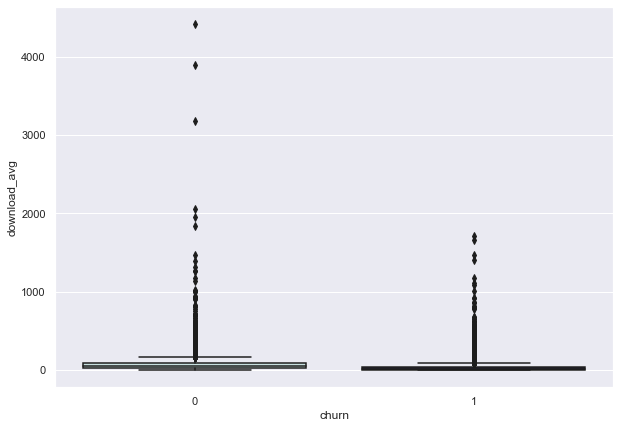

In [25]:
# for download_avg
boxplot_('download_avg')

From above we can see for each feature we've some outliers. we'll take care of them in feature engineering section.

Now let's use a pairplot to see all features at a glance and also a heatmap to see the correlation

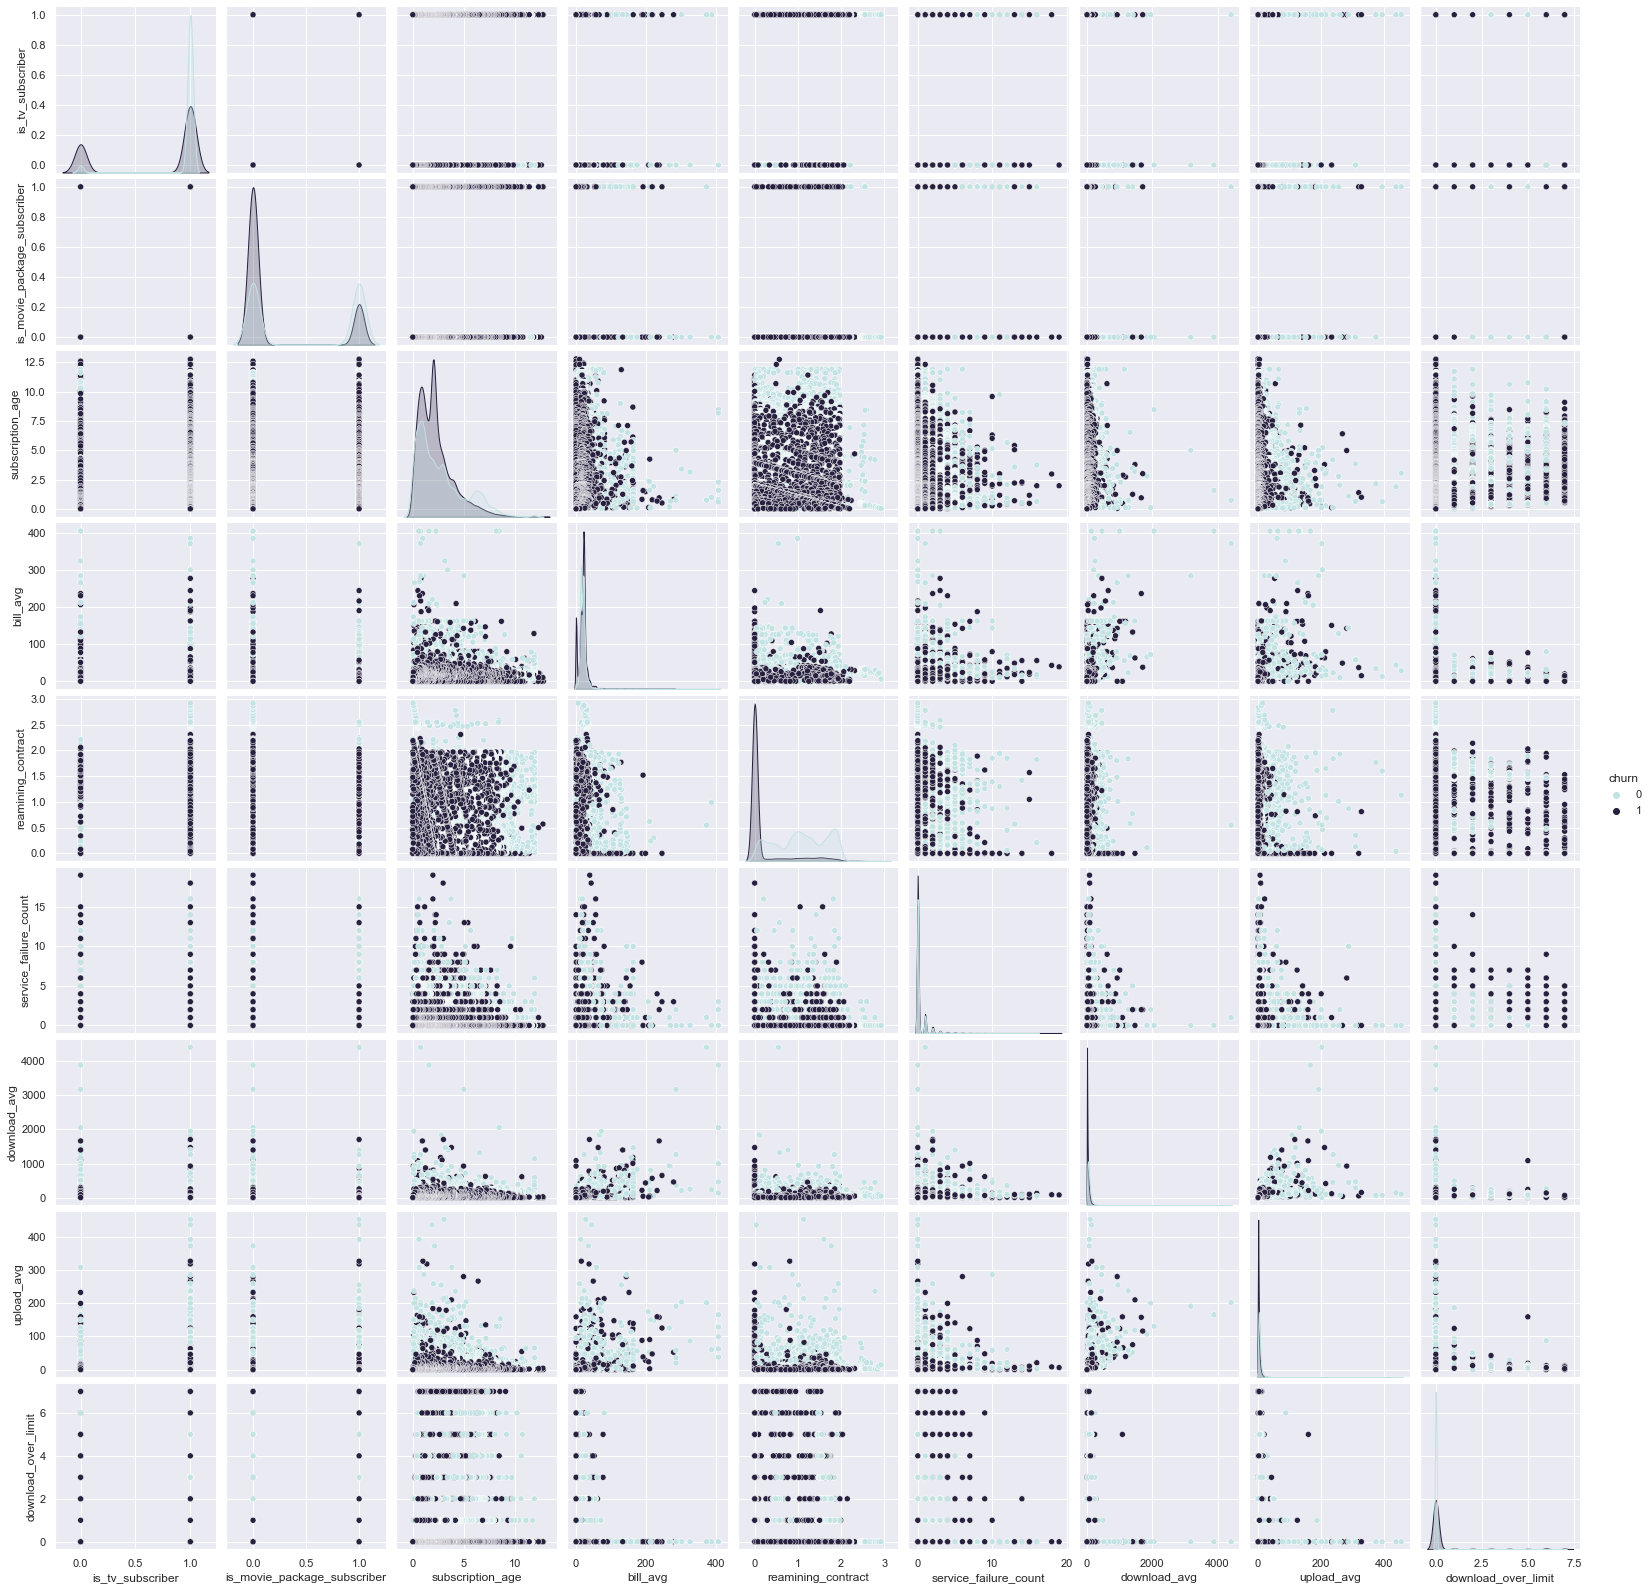

In [26]:
# pairplot
df.dropna()
sns.pairplot(df.drop('id', axis = 1), hue = 'churn', palette= 'ch:start=.2,rot=-.3') # we don't need id column for our task
plt.show()

Now let's find the correlation and see how each feature is correlated with the target as well as other variable.

In [27]:
df.corr()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
id,1.000000,0.282052,0.132197,-0.602241,0.018718,0.348195,-0.026589,0.241278,0.145936,-0.228932,-0.451142
is_tv_subscriber,0.282052,1.000000,0.337435,0.087276,-0.076245,0.178814,-0.016041,0.131650,0.065791,-0.103546,-0.327582
is_movie_package_subscriber,0.132197,0.337435,1.000000,0.131986,-0.022534,0.319179,0.013345,0.160590,0.093251,-0.026352,-0.307167
subscription_age,-0.602241,0.087276,0.131986,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277,0.023694,-0.122441
bill_avg,0.018718,-0.076245,-0.022534,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236,-0.232738,-0.021058
reamining_contract,0.348195,0.178814,0.319179,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651,-0.050014,-0.625450
service_failure_count,-0.026589,-0.016041,0.013345,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699,0.004947,0.021575
download_avg,0.241278,0.131650,0.160590,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.145936,0.065791,0.093251,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000,-0.069192,-0.162690
download_over_limit,-0.228932,-0.103546,-0.026352,0.023694,-0.232738,-0.050014,0.004947,-0.114322,-0.069192,1.000000,0.158318


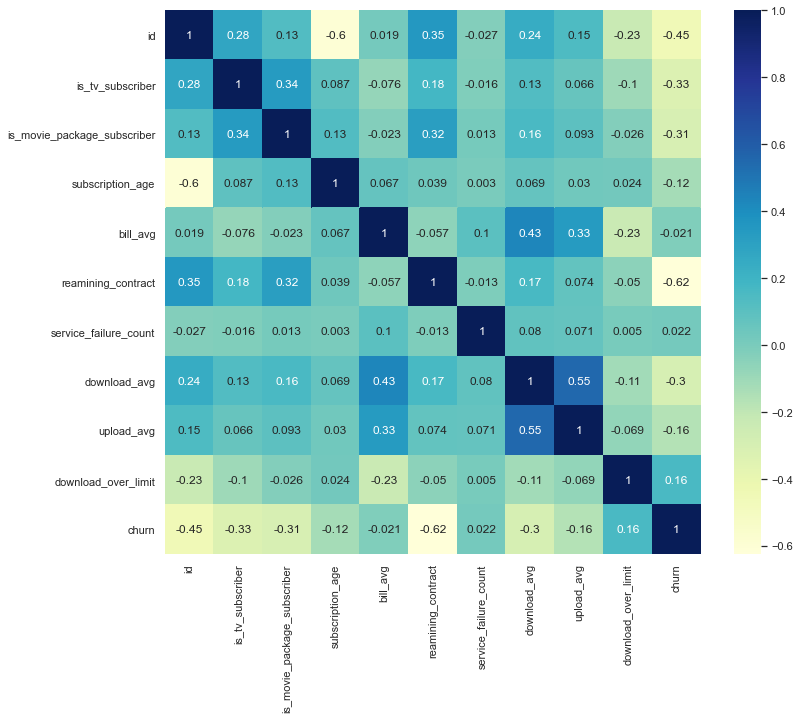

In [28]:
# It's quite tough to interprate from this chart. Let's use a heatmap to understand it visually.

plt.figure(figsize = (12,10))
sns.heatmap(np.round(df.corr(), 3), annot= True,  cmap= 'YlGnBu')
plt.show()

Here some of the variable are positively correlated like the bill age is related to the download_avg and the download_avg with upload_avg, and also the tv_subscription is related to movie subscription.

On the other hand some of are negatively correlated like the remaining_contact is highly negatively correlated to churn. That's means decreasing the number of remaining contact may happen to churn.

With This we end of our EDA part. In next step I'll show you how to do feature engineering or data cleaning.